In [21]:
import numpy as np
import math
from scipy.linalg import sqrtm
from sklearn.cluster import KMeans
import networkx as nx
import matplotlib.pyplot as plt
#import pdb


In [22]:
# Compute affinity matrix
def compute_affinity(Ad):
    A = np.zeros((len(Ad), len(Ad))) # Define Affinity matrix
    for j in range(len(data)):
        for i in range(len(data)):
            if i!=j:
                a = Ad[i]-Ad[j] # Subtract two vectors
                A[i][j] = math.exp((-(np.linalg.norm(a)**2)/2*sigma)) 
            else:
                A[i][j] = 0
    return A

In [23]:
def diagonal_matrix(A):
    D = np.zeros((len(A), len(A))) #Define matrix
    for i in range(0, len(A)):
        D[i][i]=sum(A[i,:]) # Value is teh sum of the row
    sqrtD = sqrtm(D) # Square root of D matrix
    L = np.linalg.inv(sqrtD) @ A @ np.linalg.inv(sqrtD) # n.dot multiplications and inverse matrices
    return L, D

In [24]:
def compute_eigenvectors(L, k):
    evev = np.linalg.eig(L) # Compute eigenvectos and eigenvalues 
    evalues = evev[0] # Get eigenvalues
    evectors = evev[1] # Get eigenvectors
    result = [] # Buffer for result
    ind = 0 # Indicator for loop control
    for evalue in evalues:
        result.append(np.linalg.norm(evalue)) # Store a positive modulo of the eigencalue
    norm_evalues=np.array(result) #Now we have the modulo of evalues as numpy array
    indexes = norm_evalues.argsort()[-k:][::-1] # Extract k highest values indexes
    V = np.zeros((len(L), k)) # Type of evectors can be complex
    for value in indexes:
        V[:,ind] = evectors[:,value] # Stack the k highest evectors to V
        ind = ind + 1 # Increment the loop control
    return V, result, indexes

In [25]:
def normalize_vectors(V):
    N = np.zeros((len(V), V.shape[1])) # Define normalised matrix
    for col in range(0, V.shape[1]-1):
        vector = V[:,col] # Select a column frmo V (eigenvector)
        vector_norm = vector/np.linalg.norm(vector) # Normalize using modulo that eigenvector
        N[:,col] = vector_norm # Store that vector in the normalized matrix
    return N

In [26]:
def k_means_clustering(X, k):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X) # Define the kmeans clusterization algorithm and fit it 
    return kmeans

**Begin of the programme for the first graph**

In this programme we will call the above-written transformations for a simple graph (example1.txt), plot the k most relevant eigenvalues and plot the clusterized graph. 

The predefined k is 10 for this case.

In [86]:
# Load data
data = np.genfromtxt("/Users/Juan/Library/Mobile Documents/com~apple~CloudDocs/Drive/DATOS/EIT/KTH ACADEMIC/Data Mining/labs/lab4/example2.txt", delimiter=",")

# Create graph
G = nx.Graph() 
G.add_edges_from(data[:,0:2])

# Get Adjacency matrix
aux = nx.linalg.graphmatrix.adjacency_matrix(G)
Ad = np.array(aux.todense())

# Set variable
sigma = 1 # Controls affinity speed for spatial points
k = 50 # Number of subsets

In [87]:
# Get diagonal matrix
L, D = diagonal_matrix(Ad)

# Get eigenvectors
V, evalues, indexes = compute_eigenvectors(L, k)

# Do clusterization
kmeans = k_means_clustering(V, k)


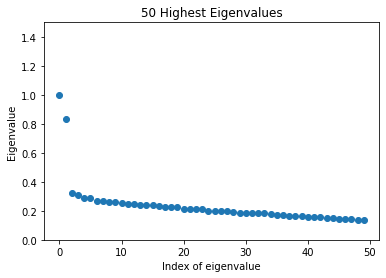

In [88]:
# Plot eigenvalues
k_highest_values = np.take(evalues, indexes)
plt.scatter(range(0, k), k_highest_values)
plt.xlabel("Index of eigenvalue")
plt.ylabel("Eigenvalue")
plt.title("{} Highest Eigenvalues".format(k))
plt.ylim([0, 1.5])
plt.show()

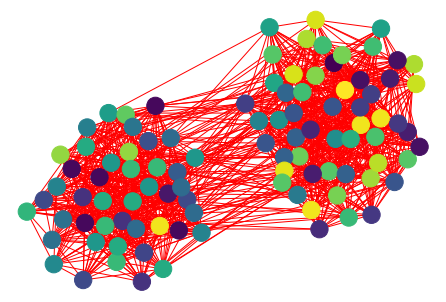

In [89]:
# Draw clustered graph
n_clusters = k
nx.draw(G, node_color=kmeans.labels_, edge_color="red")

In [90]:
# Get cluster for each node
nodes_clusters = kmeans.predict(V)
# Assign each node to a cluster
clusters = list(range(k))
result=[] # Get cluster id of each node
for id in clusters:
    result.append(np.where(nodes_clusters==id))

print(result)

[(array([4]),), (array([41, 47, 50, 74, 85]),), (array([26, 30, 60]),), (array([71]),), (array([ 1,  7, 21]),), (array([96]),), (array([69]),), (array([48, 58, 97]),), (array([ 6, 12]),), (array([27, 61, 89]),), (array([98]),), (array([39, 56, 57]),), (array([34]),), (array([ 9, 10, 18, 55]),), (array([38]),), (array([15, 22, 88]),), (array([31]),), (array([35, 44, 81, 83]),), (array([43, 54]),), (array([93]),), (array([68]),), (array([49]),), (array([32, 70, 80]),), (array([79]),), (array([23]),), (array([11]),), (array([36, 42, 45, 78]),), (array([37]),), (array([ 2, 75]),), (array([20]),), (array([46, 53, 72, 73, 84]),), (array([28]),), (array([99]),), (array([52, 64, 77, 94, 95]),), (array([24, 87, 90]),), (array([59]),), (array([16, 25, 40, 62]),), (array([92]),), (array([17]),), (array([65, 66]),), (array([29]),), (array([51, 76]),), (array([13]),), (array([ 0, 19]),), (array([91]),), (array([86]),), (array([63, 67]),), (array([33]),), (array([ 3,  8, 14, 82]),), (array([5]),)]


**ANALYSIS FOR SYNTHETIC GRAPH**

In this part of the laboratory we will analyze a synthetic graph with the functions defined above. The file is called example2.txt. We will ignore the third column from this file.

We will run the above defined transfromation for a k = 2, which we have found most appropiate for this graph clusterizations after running many times the algorithm with different k values.

In [59]:
# Load data
data = np.genfromtxt("/Users/Juan/Library/Mobile Documents/com~apple~CloudDocs/Drive/DATOS/EIT/KTH ACADEMIC/Data Mining/labs/lab4/example2.txt", delimiter=",")
data = data[:, 0:2] # Select nodes from dataset and discard last column

# Create graph
G = nx.Graph() 
G.add_edges_from(data)

# Get Adjacency matrix
aux = nx.linalg.graphmatrix.adjacency_matrix(G)
Ad = np.array(aux.todense())

# Create data matrix 
sigma = 1
k = 2 # Number of subsets

In [60]:
# Get diagonal matrix
L, D = diagonal_matrix(Ad)

# Get eigenvectors
V, evalues, indexes = compute_eigenvectors(L, k)

# Do clusterization
kmeans = k_means_clustering(V, k)


Text(0.5, 1.0, '2 Highest Eigenvalues. SYNTHETIC GRAPH')

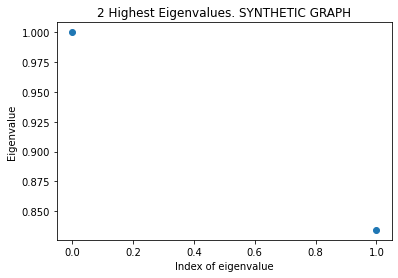

In [61]:
# Plot eigenvalues
k_highest_values = np.take(evalues, indexes)
plt.scatter(range(0, k), k_highest_values)
plt.xlabel("Index of eigenvalue")
plt.ylabel("Eigenvalue")
plt.title("{} Highest Eigenvalues. SYNTHETIC GRAPH".format(k))

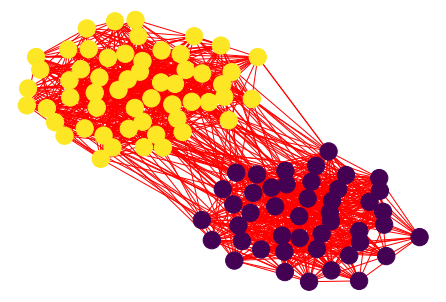

In [63]:
# Draw clustered graph
n_clusters = k
nx.draw(G, node_color=kmeans.labels_, edge_color="red")

In [127]:
# Get cluster for each node
nodes_clusters = kmeans.predict(V)
# Assign each node to a cluster
clusters = list(range(k))
result=[] # Get cluster id of each node
for id in clusters:
    result.append(np.where(nodes_clusters==id))

print(result)

[(array([34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 56, 57, 58, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81,
       82, 83, 84, 85, 92, 93, 94, 95, 97, 98, 99]),), (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       40, 55, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 75, 86, 87, 88,
       89, 90, 91, 96]),)]
